In [27]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np

import sklearn as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA


Dataset1 = pd.read_csv("BTC-USD.csv")

In [6]:
Dataset1['Date'] = pd.to_datetime(Dataset1['Date'])
Dataset1['Year'] = Dataset1['Date'].dt.year
Dataset1 = Dataset1.dropna(subset=['Close'])
median = Dataset1['Close'].median()
Dataset1['Close'] = Dataset1['Close'].fillna(median)
imputer = SimpleImputer(strategy='median')
X = Dataset1[['Year']]
y = Dataset1['Close']
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1,1))



In [7]:
Dataset1

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07,2016
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07,2016
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07,2016
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07,2016
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07,2016
...,...,...,...,...,...,...,...,...
2146,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10,2021
2147,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,2021
2148,2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,2021
2149,2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,2021


##**Abstract:**

Bitcoin es una moneda digital descentralizada creada en enero de 2009. Sigue las ideas expuestas en un Whitepaper por el misterioso y seudónimo Satoshi Nakamoto.12 La identidad de la persona o personas que crearon la tecnología sigue siendo un misterio. Bitcoin ofrece la promesa de tarifas de transacción más bajas que los mecanismos tradicionales de pago en línea y, a diferencia de las monedas emitidas por los gobiernos, es operado por una autoridad descentralizada.
En este Dataset, podemos apreciar diferentes datos de este criptoactivo con el correr de los años. Buscamos también, detectar tendencias, cambios y patrones a través de los años.

Problema comercial:

¿solución o problema?
Demasiado volátil. Estructuralmente el bitcoin es demasiado volátil para que se consolide como sistema de transacción o activo de inversión estable. Los movimientos de doble dígito dentro de la misma sesión han sido una constante durante los últimos meses, algo que es un problema para los particulares pero aún más para cualquier negocio que tiene que planificar con antelación y que, en muchos casos, trabaja con márgenes reducidos. Para que el Bitcoin pueda ser una referencia, no puede estar sujeto a subidas y bajadas en su cotización de tan tremenda volatilidad.

Ineficiente. El consumo energético procedente de la minería de bitcoin ya alcanza niveles tan elevados como el de toda la energía que se consume en países como Hungría, Qatar o Nueva Zelanda.


Limitación del sistema. Si no se extrae el bitcoin, las transacciones no se aprueban y no se producen nuevos bitcoins. Hasta el 13 de enero se han extraído 16.800.000 bitcoins acercándose a los máximos históricos registrados en 21 millones de monedas extraídas. Cuando se hayan extraído todos los bitcoins, el suministro ya no podrá crecer más.

Elevados costes de transacción. Uno de los principales problemas a los que se enfrenta el bitcoin son los elevados costes de una simple transacción. 

Las elevadísimas tasas de transacción están cambiando fundamentalmente el bitcoin. Originalmente, uno de los mayores atractivos comerciales del bitcoin era que los pagos de las transacciones eran rápidas, cómodos y, lo más importante, baratos.

Desregulación. Una de las características particulares de la criptodivisa es su naturaleza descentralizada. Ningún banco central la apoya ni las operaciones pueden ser rastreadas.

##**Propuesta:**

Nuestra investigación sobre el Bitcoin aborda las tendencias, cambios y sus patrones. A partir del aumento del precio de este criptoactivo  buscamos  desarrollar un algoritmo que pudiese predecir futuros precios a partir de la información histórica brindada.

EDA:

Comenzamos con nuestro analisis exploratorio de datos (EDA) en el que intentaremos extraer de la manera mas limpia y efectiva posible la mayor informacion de nuestro dataset. Algunas de las cuestiones a ejemplificar seran las siguientes:

1-¿Con que tipo de datos estamos trabajando?

2-¿Cuenta con datos duplicados o nulos?

Gráfico 1: 

3- ¿Como es la relación entre el precio y el tiempo? 

4- ¿En que porcentaje aumentó?

Gráfico 2:

5- ¿Como es la relación entre "Highs" y "Lows"?

6- ¿Tiene una pendiente creciente o decreciente?

Gráfico 3:

7- ¿Como es la relación entre el volumen y el tiempo?

8- ¿Fue aumentando o descendiendo?

Gráfico 4

9- ¿Como se distribuyeron los mínimos en cada año?

10- ¿Como es la relación de mínimos entre los años?

Gráfico 5

11- ¿Como se distribuyeron los máximos en cada año?

12- ¿Son máximos mayores o menores?

Gráfico 6

13- ¿Como es la relación entre los años, el volumen y el precio?

14- ¿Hay alguna tendencia?

In [8]:
Dataset1

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07,2016
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07,2016
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07,2016
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07,2016
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07,2016
...,...,...,...,...,...,...,...,...
2146,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10,2021
2147,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,2021
2148,2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,2021
2149,2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,2021


In [9]:
Dataset1['Year'] = Dataset1['Year'].astype('float64')

In [10]:
Dataset1['Year'].dtype

dtype('float64')

In [10]:
#Tipo de datos
Dataset1.dtypes



Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Year                float64
dtype: object

1- En su mayoría estamos trabajando con Flotantes, es decir, números brutos o que contienen decimales

In [11]:
#Nulos:
Dataset1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64

In [12]:
#Tamaño:
Dataset1.shape

(2147, 8)

In [13]:
# Dropeamos Duplicados y Nulos:
Dataset1.drop_duplicates(inplace=True)
Dataset1 = Dataset1.dropna()
Dataset1.shape

(2147, 8)

**Respuestas a las preguntas planteadas en la EDA**

2- Sí, tenemos datos nulos los cuales ya fueron eliminados. No contamos duplicados

3- Con el correr del tiempo, podemos apreciar que la tendencia es alcista. Si bien no siempre se mantiene así, habiendo fluctuaciones e incluso años bajistas, la tendencia general si es alcista

4- El precio aumento en un 13000%




In [14]:
(58137.187500*430.721008)/100

250409.08002285

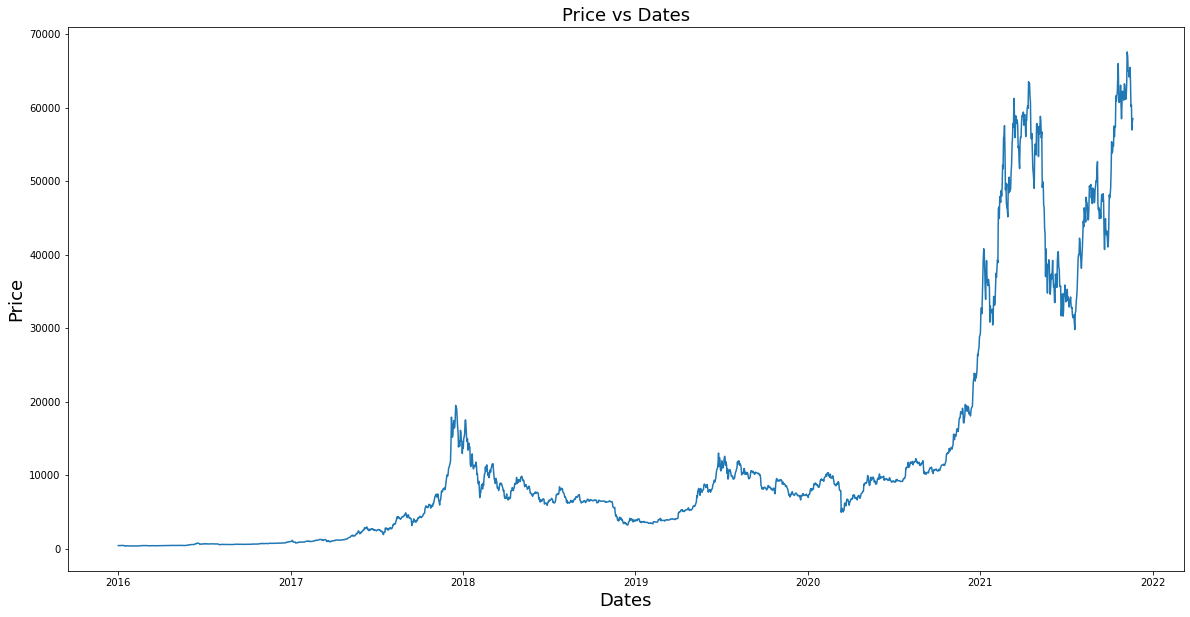

In [15]:
#Gráfico 1

x = Dataset1['Date']
y = Dataset1['Close']

plt.figure(figsize=(20,10))

plt.xlabel('Dates', fontsize=18)
plt.ylabel('Price', fontsize=18, rotation=90)
plt.title('Price vs Dates', fontsize=18)
plt.plot(x, y)

plt.show()

5- La relación entre "Highs" Y "Lows" es creciente, siendo así que los mínimos son cada vez mayores y los máximos también.

6- La pendiente es creciente.

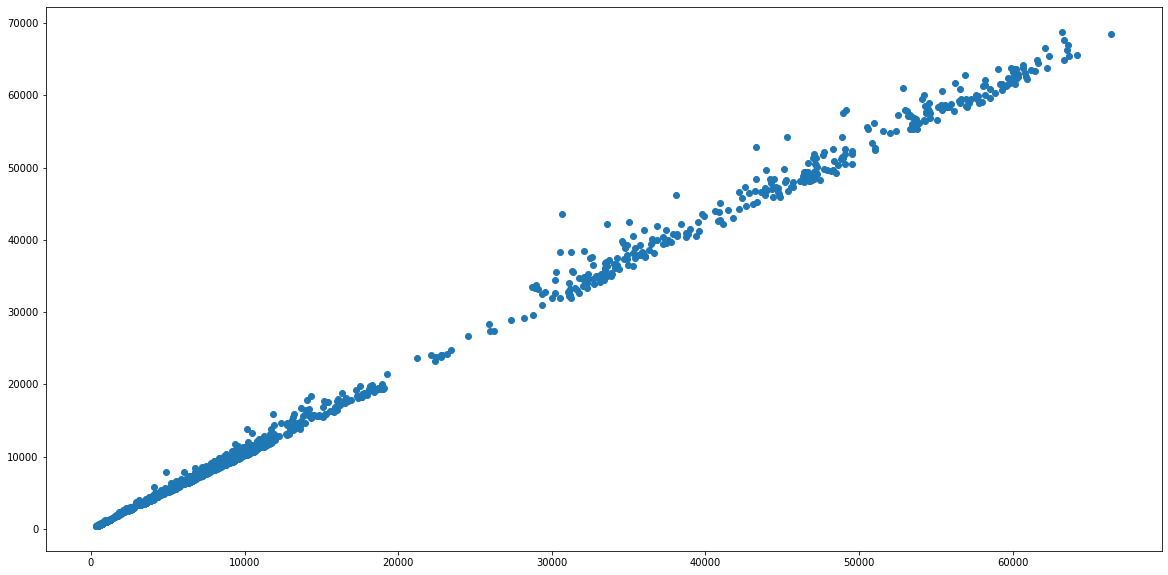

In [16]:
#Gráfico 2

x = Dataset1['Low']
y = Dataset1['High']

plt.figure(figsize=(20,10))
plt.scatter(x,y)

7- El volumen fue en aumento con el correr del tiempo, esto se relaciona con la adopción del Bitcoin y otros factores. 

8- El volumen aumentó, teniendo su pico en 2021

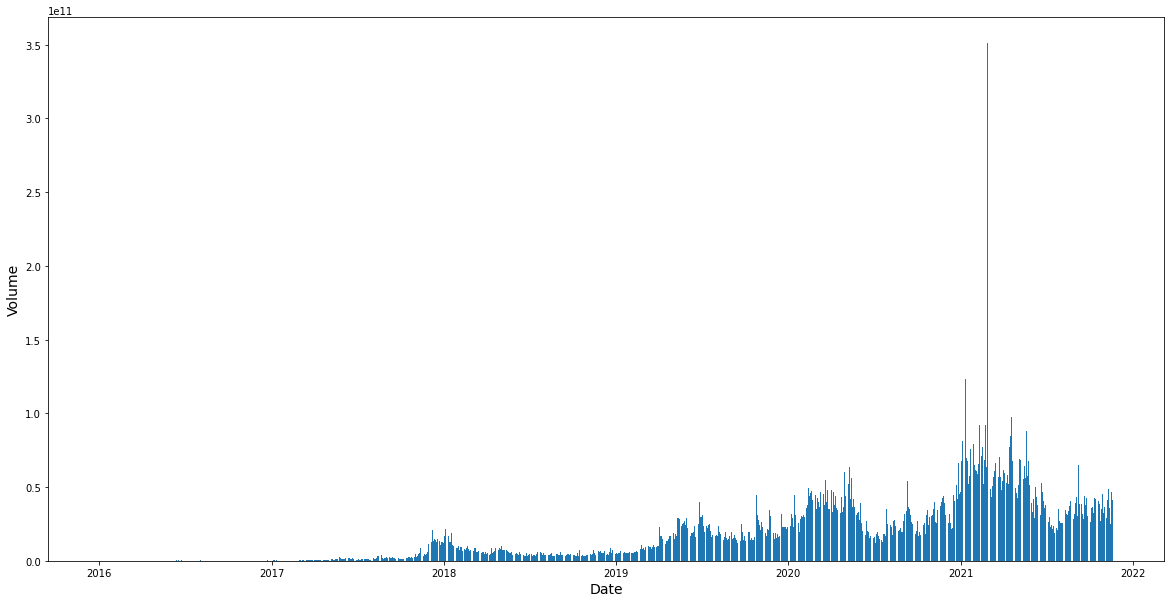

In [17]:
#Gráfico 3

x = Dataset1['Date']
y = Dataset1['Volume']

plt.figure(figsize=(20,10))
plt.bar(x, y)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)

plt.show()

9- Viendo el gráfico a gran escala, los mínimos fueron cada vez mayores.

10- En 2018 y 2019 se vieron mínimos menores (en promedio) a los del 2017. Desde 2019 a 2021 los mínimos fueron cada vez mayores.

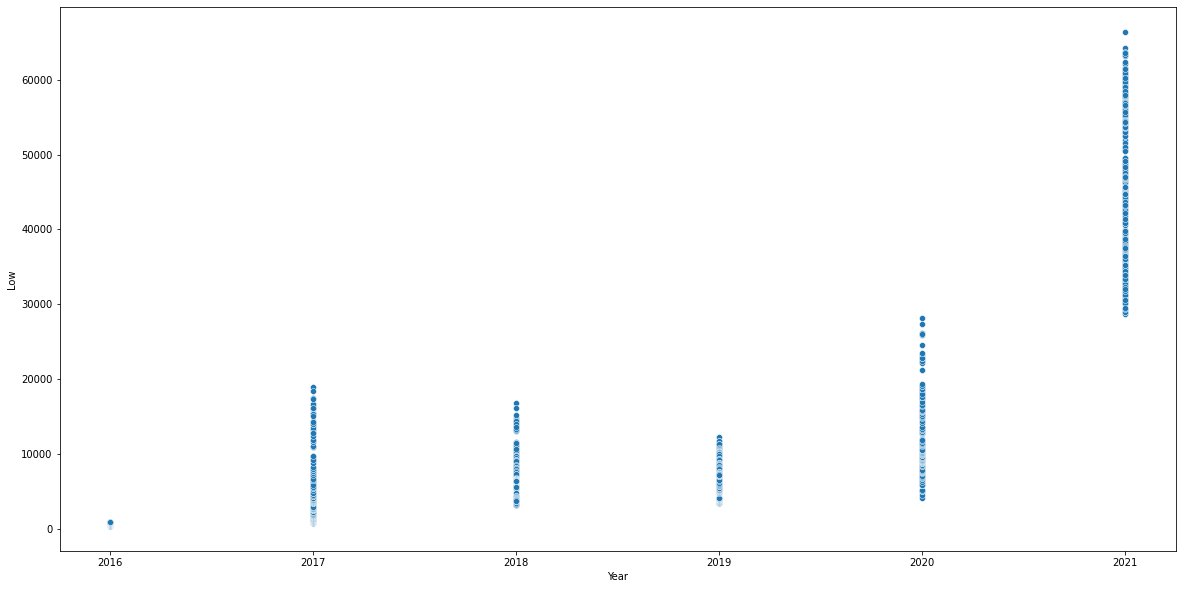

In [18]:
#Gráfico 4

x = Dataset1['Year']
y = Dataset1['Low']


plt.figure(figsize=(20,10))
sns.scatterplot(x=x, y=y)
plt.show()

11- Los máximos aumentaron, siendo así cada vez mayores.

12- Los máximos son generalmente mayores, excepto entre 2018 y 2019 donde se mantuvieron casi constantes.

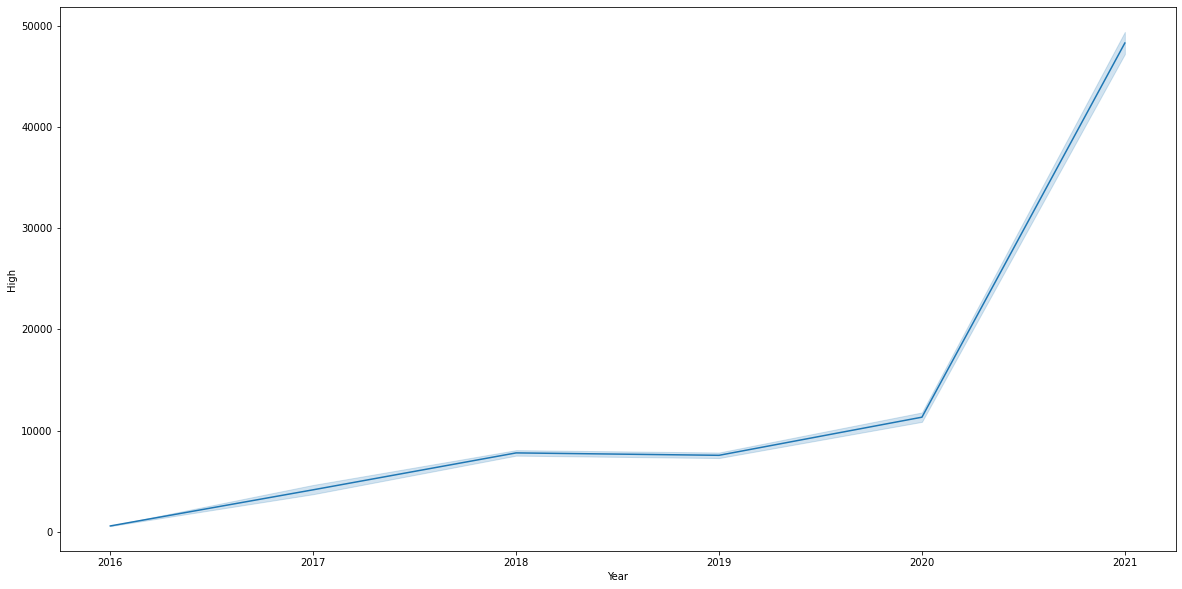

In [19]:
#Gráfico 5

x = Dataset1['Year']
y = Dataset1['High']


plt.figure(figsize=(20,10))
sns.lineplot(x=x, y=y)
plt.show()

13- La relación entres los años, el volumen y el precio es creciente, aumentando así el volumen y el precio

14- La tendencia general es alcista

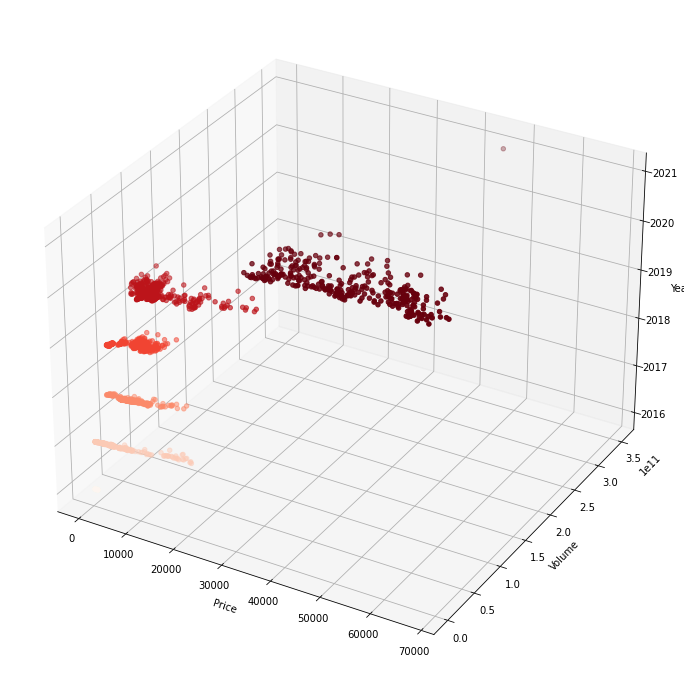

In [20]:
#Gráfico 6

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')


x = Dataset1['Close']
y = Dataset1['Volume']
z = Dataset1['Year']

ax.scatter(x, y, z, c=z, cmap='Reds')

ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Year')

plt.show()

**Resolución de consigna "Evaluando modelos de ML"**


In [21]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(Dataset1.drop(['Date'], axis=1), Dataset1['Close'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Crear una instancia del modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
reg.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# Calcular el ajuste R^2 ajustado
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2: ", adj_r2)

R2:  1.0
MSE:  1.6828721770621983e-16
MAE:  1.0554209454714383e-08
Adjusted R2:  1.0


Las métricas que se muestran corresponden a la evaluación del modelo de regresión lineal sobre los datos de prueba.

R2 (coeficiente de determinación) es una medida que indica la proporción de la varianza en la variable de respuesta que se explica por la variable explicativa. Tiene un rango de 0 a 1, siendo 1 el valor ideal que indica que el modelo ajustado explica perfectamente la variabilidad de los datos. En este caso, se obtuvo un valor de 1, lo que sugiere que el modelo se ajustó perfectamente a los datos de prueba.

MSE (error cuadrático medio) es una medida del promedio de los errores al cuadrado entre las observaciones reales y las predichas por el modelo. Tiene un rango de 0 a infinito, siendo 0 el valor ideal que indica que no hay errores en las predicciones. En este caso, se obtuvo un valor muy pequeño (del orden de 10^-16), lo que sugiere que las predicciones del modelo son muy cercanas a los valores reales.

MAE (error absoluto medio) es una medida del promedio de los errores absolutos entre las observaciones reales y las predichas por el modelo. Al igual que el MSE, tiene un rango de 0 a infinito, siendo 0 el valor ideal que indica que no hay errores en las predicciones. En este caso, se obtuvo un valor muy pequeño (del orden de 10^-8), lo que sugiere que las predicciones del modelo son muy precisas.

El R2 ajustado tiene en cuenta el número de variables explicativas y el tamaño de la muestra. En este caso, el valor obtenido es 1, lo que indica que todas las variables explicativas son útiles y que el modelo se ajusta adecuadamente a los datos de prueba.

**Método de Feature Selection**

- El método de Feature Selection que escogimos es el de Pearson, mejor conocido como coeficiente de correlación, caracterizado por ser una prueba que mide la relación estadística entre dos variables continuas. Elegimos este método debido a la asociación lineal de los elementos.

- Por otro lado, agregamos un mapa de calor que muestra todas las correlaciones de las variables y además, Agregamos los datos que correlación de "Close" en un apartado, ya que es una variable de nuestro interés

C:\Users\Marcos\AppData\Local\Temp\ipykernel_4308\3752251596.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = Dataset1.corr()


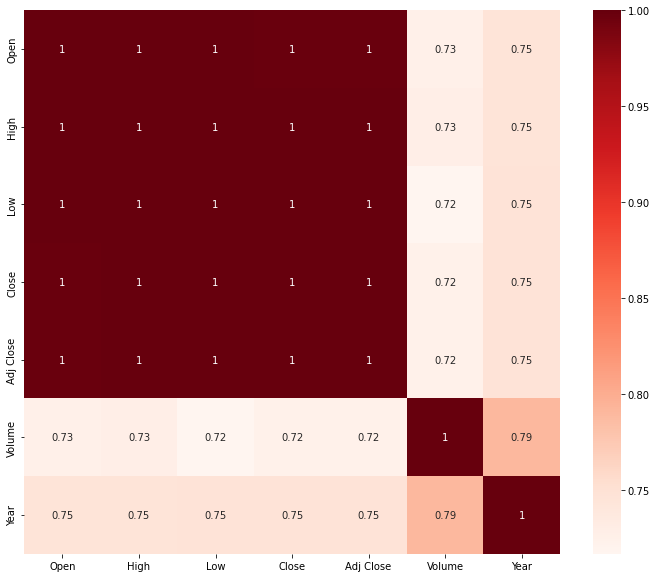

In [22]:
plt.figure(figsize=(12,10))
cor = Dataset1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Open         0.998678
High         0.999433
Low          0.999325
Close        1.000000
Adj Close    1.000000
Volume       0.723533
Year         0.746763
Name: Close, dtype: float64

**Modelo de Series de tiempo**

Utilizamos ARIMA para hacer un modelo de autoregresión utilizando el Dataset completo

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2151
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17422.101
Date:                Sun, 19 Mar 2023   AIC                          34850.203
Time:                        00:26:18   BIC                          34867.223
Sample:                             0   HQIC                         34856.429
                               - 2151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4848      0.193     -2.517      0.012      -0.862      -0.107
ma.L1          0.4473      0.198      2.256      0.024       0.059       0.836
sigma2      6.608e+05   6417.723    102.972      0.0

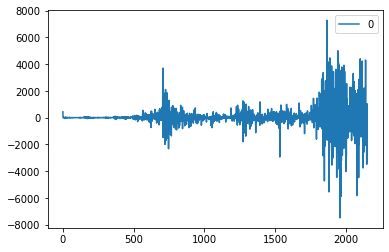

In [29]:
# Ordenamos el DataFrame por el índice
Dataset1 = Dataset1.sort_index()

# Ajustamos el modelo ARIMA a los datos
model = ARIMA(Dataset1['Close'], order=(1,1,1))
results = model.fit()

# Imprimimos el resumen del modelo
print(results.summary())

# Representamos gráficamente los residuos del modelo
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()

**Modelo de Series de tiempo (3 meses)**

Utilizamos ARIMA para hacer un modelo de autoregresión utilizando los últimos 3 meses del Dataset (Ciclo)

C:\Users\Marcos\AppData\Local\Temp\ipykernel_4308\1899640148.py:5: UserWarning: Discarding nonzero nanoseconds in conversion.
  last_3_months = Dataset1.loc[pd.DatetimeIndex(Dataset1.index) >= pd.to_datetime(Dataset1.index.max()) - pd.DateOffset(months=3)]


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2151
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17422.101
Date:                Sun, 19 Mar 2023   AIC                          34850.203
Time:                        00:26:09   BIC                          34867.223
Sample:                             0   HQIC                         34856.429
                               - 2151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4848      0.193     -2.517      0.012      -0.862      -0.107
ma.L1          0.4473      0.198      2.256      0.024       0.059       0.836
sigma2      6.608e+05   6417.723    102.972      0.0

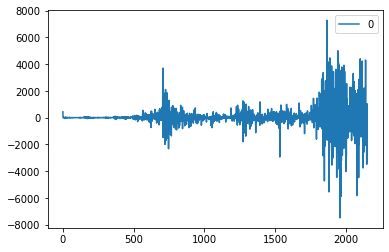

In [28]:
# Ordenamos el DataFrame por el índice
Dataset1 = Dataset1.sort_index()

# Seleccionamos los últimos 3 meses del Dataset
last_3_months = Dataset1.loc[pd.DatetimeIndex(Dataset1.index) >= pd.to_datetime(Dataset1.index.max()) - pd.DateOffset(months=3)]

# Ajustamos el modelo ARIMA a los datos
model = ARIMA(last_3_months['Close'], order=(1,1,1))
results = model.fit()

# Imprimimos el resumen del modelo
print(results.summary())

# Representamos gráficamente los residuos del modelo
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()